<a href="https://colab.research.google.com/github/pedrogxv/PI/blob/master/colabs/Binary_Logistic_Regression_from_Scratch_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introdução

A Regressão Logística é um dos algoritmos mais básicos e populares para resolver problemas de classificação. Ela recebe esse nome porque sua técnica subjacente é bastante semelhante à da Regressão Linear. O termo “Logistic” vem da função *Logit* (função sigmoide) utilizada nesse método de classificação.

A regressão logística é um algoritmo de classificação de aprendizado supervisionado usado para prever a probabilidade de uma variável alvo. A natureza da variável alvo ou dependente é dicotômica, o que significa que existem apenas duas classes possíveis.

De forma simples, a variável dependente é binária, com dados codificados como 1 (representando sucesso/sim) ou 0 (representando falha/não).

Matematicamente, um modelo de regressão logística prevê $P(Y = 1)$ como uma função de $X$. É um dos algoritmos de aprendizado de máquina mais simples e pode ser usado em diversos problemas de classificação, como detecção de spam, previsão de diabetes, detecção de câncer, entre outros.


# Binary (Binomial) Logistic Regression model

Nesse tipo de classificação, a variável dependente terá apenas dois tipos possíveis: 1 ou 0. Por exemplo, essas variáveis podem representar sucesso ou falha, sim ou não, vitória ou derrota, etc.

A forma mais simples de regressão logística é a **regressão logística binária** ou **binomial**, na qual a variável alvo (ou dependente) pode assumir apenas dois valores possíveis: 1 ou 0. Esse método permite modelar a relação entre múltiplas variáveis preditoras e uma variável alvo binária/binomial.

No caso da regressão logística, a função linear é usada basicamente como entrada para outra função.

Vamos implementar o conceito de regressão logística binomial em Python. Para isso, primeiro precisamos importar as bibliotecas necessárias, conforme segue:



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

Vamos testar nosso algoritmo com a função `make_blobs` do módulo `datasets` da biblioteca `sklearn`.


In [ ]:
X, y = datasets.make_blobs(n_samples=400, n_features=2, centers=2, cluster_std=.8, shuffle=True, random_state=0)

In [ ]:
X.shape

(400, 2)

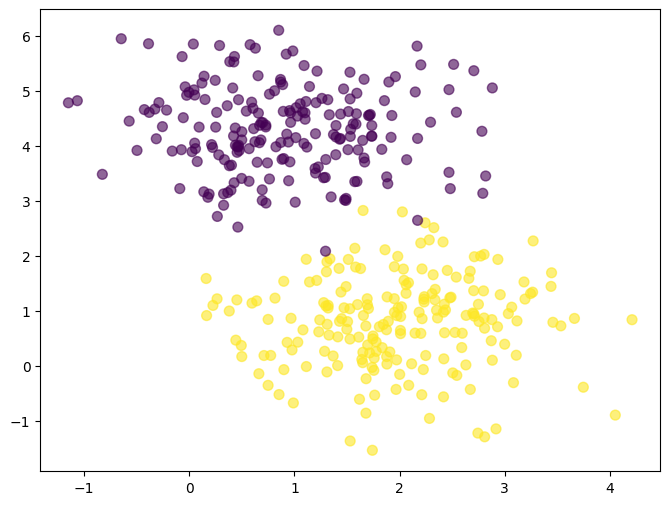

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,1], c=y, s=50, alpha=0.6)
plt.show()

## Cost (Loss) function [Cross Entropy function]

A fórmula fornece a função de custo para a regressão logística:

$$
J(\theta)=-\frac{1}{m}\sum_{i=1}^{m}[y^{i}\ln(h_{\theta}(x^{i}))+(1-y^{i})\ln(1-h_{\theta}(x^{i}))]
$$

Onde a hipótese $h_{\theta}$ é a função sigmoide.


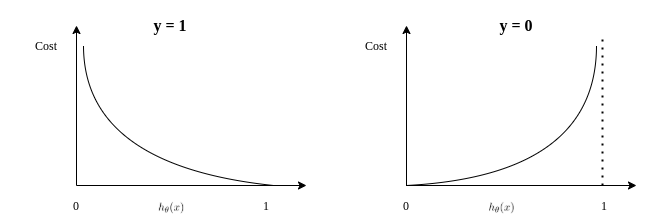

Demonstração da Função de Custo (Perda) de Regressão Logística com *Cross Entropy*.


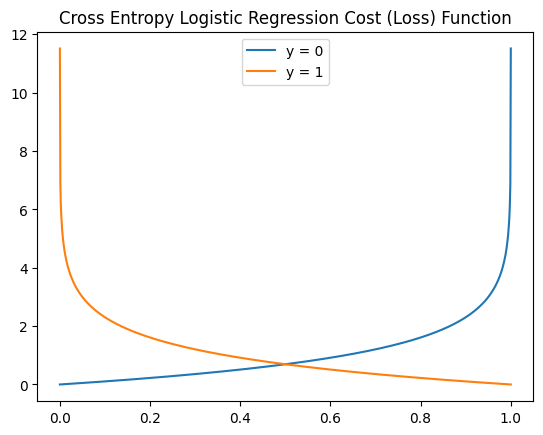

In [ ]:
# Logistic Regression Cost (Loss) Function
def cost(h, y):
   return -(y * np.log(h) + (1 - y) * np.log(1 - h)).mean()

n = 1000
hh = np.linspace(1e-5, 0.99999, n)
yy_0 = np.zeros(n)
yy_1 = np.ones(n)
cc0 = []
cc1 = []
cc_sum=[]
for i in range(n):
  ll0 = cost(hh[i], yy_0[i])
  ll1 = cost(hh[i], yy_1[i])
  cc0.append(ll0)
  cc1.append(ll1)
  cc_sum.append(ll0+ll1)

plt.plot(hh, cc0, label='y = 0')
plt.plot(hh, cc1, label='y = 1')
plt.title('Cross Entropy Logistic Regression Cost (Loss) Function')
plt.legend()
plt.show()

#plt.plot(hh,cc_sum)
#plt.title('Final Cross Entropy sum')
#plt.show()


## Gradiente Descendente

A descida do gradiente é um algoritmo de otimização responsável por encontrar os parâmetros que melhor se ajustam ao modelo. Ao derivarmos a função de custo, obtemos a expressão da descida do gradiente:


$$\frac{\partial J(\theta )}{\partial \theta_{j}}=\frac{1}{m} \sum_{i=1}^{m} \left( h_{\theta}(x^{(i)}) - y^{(i)} \right) x_j^{(i)} $$

A forma vetorizada da expressão da descida do gradiente, que utilizaremos em nosso código, é:


$$∇J(\theta)=X^T (h_{\theta}(x) - y) $$

## Minimizando o  Custo com o Gradiente Descendente

Suponha que tenhamos um total de $n$ features. Nesse caso, temos $n$ parâmetros para o vetor $\theta$. Para minimizar nossa função de custo, precisamos aplicar o gradiente descendente em cada parâmetro $\theta_j$:

$$
\theta_j \gets \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta),
$$

onde $\alpha$ é a taxa de aprendizado (*learning rate*) e $\theta$ é representado aqui pelo vetor de pesos ($w$).


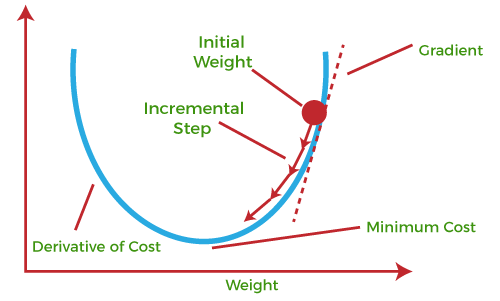

## Definir funções

A seguir, vamos definir a função sigmoide, a função de perda (loss) e o gradiente descendente.


In [ ]:
# adiciona uma coluna de '1' correspondente ao weight(0)
def addOnes(X):
   intercept = np.ones((X.shape[0], 1))
   return np.concatenate((intercept, X), axis=1)

# outra maneira de adicionar uma coluna de '1' correspondente ao weight(0)
def addOnes_(X):
    return np.c_[np.ones(X.shape[0]),X]

# função logística (sigmoid)
def sigmoid(z):
   return 1 / (1 + np.exp(-z))

# função perda (loss), também chamda de função custo (cost) ou função erro (error)
# log-likelihood function (LLF) --> maximum likelihood estimation
def loss(h, y):
   return -(y * np.log(h) + (1 - y) * np.log(1 - h)).mean()

# treinamento do modelo
def fit(X, y, eta, num_iter):
    # initialize the weights with zeros
    w = np.zeros(X.shape[1])
    # initialize cost vector with empty list
    cost_ = []

    for i in range(num_iter):
        # multiplicação da matriz X pelo vetor peso (w)
        z = np.dot(X, w)
        # função logística (sigmoid) --> 0 < h < 1
        h = sigmoid(z)
        # função custo (perda)
        loss_ = loss(h, y)
        # salvo valor da função custo
        cost_.append(loss_)
        # derivada da função custo --> gradiente(custo) --> Função Gradiente Descendente
        gradient = np.dot(X.T, (h - y)) / y.size
        # atualização dos pesos (gradiente descendente) ==> w = w - eta * gradiente
        w -= eta * gradient

        if(i % 100 == 0):
            print(f'loss[{i}]: {loss_}')
            #cost_.append(loss_)

    return cost_, w

# predict the output probabilities
def predict_prob(X, w):
   return sigmoid(np.dot(X, w))

def prediction(X, w):
   return predict_prob(X, w).round()

# medição da acurácia das predições
def Accuracy(y, y_hat):
    match = 0
    n = y.shape[0]
    for i in range(n):
        if(y[i] == y_hat[i]):
            match += 1

    accuracy = match / n
    return accuracy

In [ ]:
# adiciona uma coluna de '1' correspondente ao weight(0)
X_ones = addOnes_(X)
# learning rate --> hyperparameter
eta = 0.01
# number of iterations (epochs)
n_epochs = 4001
# Fit net --> retorna a função custo em forma de vetor e o vetor peso final otimizado
fCusto, w = fit(X_ones, y, eta, n_epochs)

loss[0]: 0.6931471805599452
loss[100]: 0.38935812410239007
loss[200]: 0.29322992381066426
loss[300]: 0.2420899508632486
loss[400]: 0.21033760620911146
loss[500]: 0.18860347984149733
loss[600]: 0.1727081991219108
loss[700]: 0.16051827826065362
loss[800]: 0.1508320474456897
loss[900]: 0.14292061059852731
loss[1000]: 0.1363156453553646
loss[1100]: 0.1307021192443937
loss[1200]: 0.1258600398279571
loss[1300]: 0.12163093960571367
loss[1400]: 0.1178976437572019
loss[1500]: 0.11457155279408102
loss[1600]: 0.11158436862092133
loss[1700]: 0.10888254909187185
loss[1800]: 0.10642349377270921
loss[1900]: 0.10417286004031619
loss[2000]: 0.10210263607317455
loss[2100]: 0.10018973216572812
loss[2200]: 0.09841493418755212
loss[2300]: 0.09676211467578803
loss[2400]: 0.09521763022677618
loss[2500]: 0.09376985561730464
loss[2600]: 0.09240881964310362
loss[2700]: 0.0911259175725915
loss[2800]: 0.08991368197092552
loss[2900]: 0.08876559846500344
loss[3000]: 0.08767595644873176
loss[3100]: 0.086639727200274

In [ ]:
print('Valor final da Função Custo (Perda): ', fCusto[-1])

Valor final da Função Custo (Perda):  0.07912076486359597


In [ ]:
# o objetivo é encontrar os pesos otimizados (weights) das entradas através do treinamento do modelo
print('Os pesos do modelo treinado:', w)

Os pesos do modelo treinado: [ 1.38969642  1.97865402 -1.8697276 ]


In [ ]:
# Compute the prediction output value y (y_hat)
# Utilizando os pesos do modelo treinado vamos fazer as predições (y_hat = ŷ)
y_hat = prediction(X_ones, w)
#print('Matrix y: \n', y)
#print('Matrix prediction y_hat: \n', y_hat.astype('int'))

In [ ]:
# imprimindo a quantidade dos erros de predição
print('Mismatch prediction: ', (y!=y_hat).sum())

Mismatch prediction:  10


In [ ]:
# Acurácia --> métrica de eficiência do algoritmo
acc = Accuracy(y, y_hat)
#print('Acurácia: ', acc)
print("Accuracy: {:.1f}%".format(acc * 100))
accuracy = (y_hat == y).mean()
print("Accuracy (outra forma): {:.1f}%".format(accuracy * 100))

Accuracy: 97.5%
Accuracy (outra forma): 97.5%


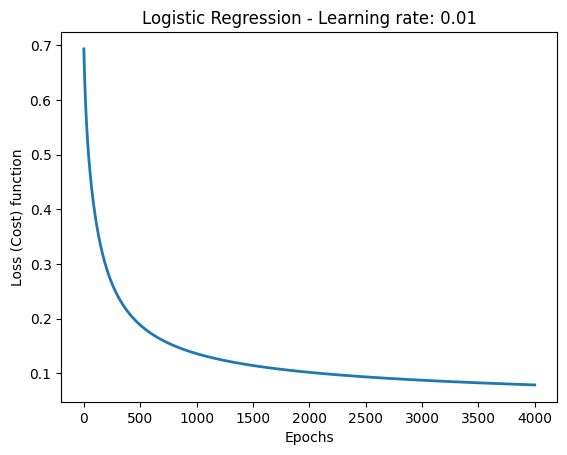

In [ ]:
#plt.plot(range(1, len(fCusto) + 1), fCusto, marker='.')
#plt.plot(range(1, len(fCusto) + 1), fCusto, linewidth=2)
plt.plot(fCusto, linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Loss (Cost) function')
plt.title('Logistic Regression - Learning rate: ' + str(eta))
plt.show()

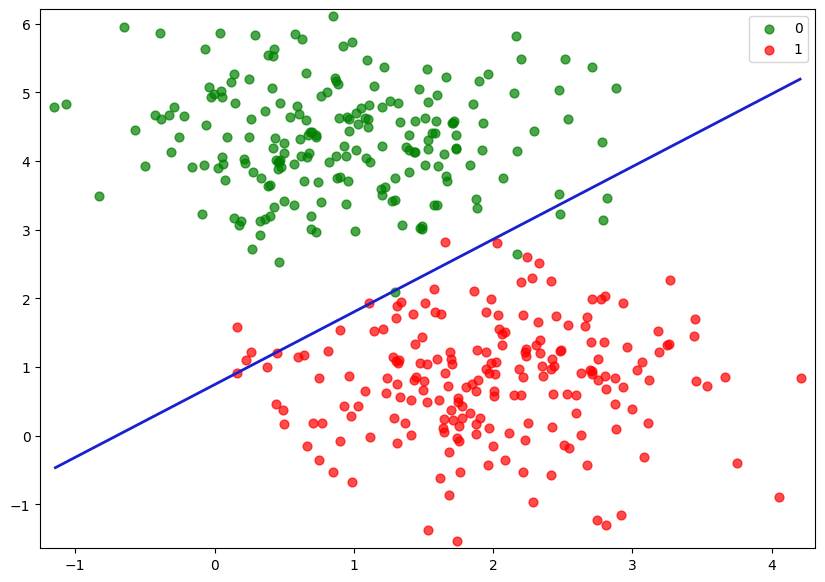

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='g', label='0', alpha=.7, s=40)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1', alpha=.7, s=40)
plt.legend()
x1_min, x1_max = X[:,0].min(), X[:,0].max()
x2_min, x2_max = X[:,1].min(), X[:,1].max()
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
# adiciona uma coluna de '1' correspondente ao weight(0)
grid_ones = addOnes_(grid)
# grid_ones = np.c_[np.ones(grid.shape[0]),grid]

# predict the output probabilities with sigmoid function
probs = predict_prob(grid_ones, w).reshape(xx1.shape)
# plota a margem limítrofe de classificação
plt.contour(xx1, xx2, probs, [.5], linewidths=2, colors='#1820d0')
plt.xlim(x1_min - .1, x1_max + .1)
plt.ylim(x2_min - .1, x2_max + .1)
plt.show()


# Exercícios

1. Ajustar parâmetros do modelo:
Testar diferentes valores de learning rate e epochs e comentar os resultados.

2. Explorar configurações do dataset:
Alterar número de amostras e proporção treino/teste, observando o impacto na acurácia.



# Referências

[1] https://www.tutorialspoint.com/machine_learning_with_python/classification_algorithms_logistic_regression.htm

[2] http://neuralnetworksanddeeplearning.com/chap3.html

[3] https://towardsdatascience.com/introduction-to-logistic-regression-66248243c148

[4] https://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html

[5] https://arunaddagatla.medium.com/maximum-likelihood-estimation-in-logistic-regression-f86ff1627b67

# Para inspirar suas soluções

In [ ]:

def rodar_(x_in,y_in, eta_in, n_epochs_in):

  X_ones = addOnes_(x_in)
  y_in = y
  eta = eta_in
  n_epochs = n_epochs_in

  fCusto, w = fit(X_ones, y, eta, n_epochs)

  print('Valor final da Função Custo (Perda): ', fCusto[-1])

  # o objetivo é encontrar os pesos otimizados (weights) das entradas pelo treinamento da rede
  print('Os pesos da rede treinada:', w)

  # Compute the prediction output value y (y_hat)
  y_hat = prediction(X_ones, w)
  #print('Matrix y: \n', y)
  #print('Matrix prediction y_hat: \n', y_hat.astype('int'))

  print('Mismatch prediction: ', (y!=y_hat).sum())

  # Acurácia
  acc = Accuracy(y, y_hat)
  #print('Acurácia: ', acc)
  print("Accuracy: {:.1f}%".format(acc * 100))
  accuracy = (y_hat == y).mean()
  print("Accuracy (another way): {:.1f}%".format(accuracy * 100))

  return fCusto, w,  [eta_in, n_epochs_in, (y!=y_hat).sum(), acc]

#x_in -> X
#y_in -> Y
#eta_in -> eta
#n_epochs_in

from matplotlib.lines import Line2D
from matplotlib.patches import Patch

eta_in = [1, 0.1, 0.01, 0.001, 0.0001]
n_epochs = [1000, 1000, 1000, 1000, 1000]
color = ['blue','orange','green','red','purple']

print(eta_in[0])
for i in range(0,len(eta_in)):
  print('\n-------------------------------------------------')
  print(f'Eta = {eta_in[i]}, epocas = {n_epochs[i]}\n')
  exec(f'fcusto{i}, w{i}, lista{i} = rodar_(X,y, eta_in[{i}], n_epochs[{i}])')

1

-------------------------------------------------
Eta = 1, epocas = 1000

loss[0]: 0.6931471805599452
loss[100]: 0.05732820086360533
loss[200]: 0.04441270966548437
loss[300]: 0.03803079868466355
loss[400]: 0.03415670874150456
loss[500]: 0.03155499442852887
loss[600]: 0.029690347130302025
loss[700]: 0.028290667014195386
loss[800]: 0.027202926866491804
loss[900]: 0.026334535068670048
Valor final da Função Custo (Perda):  0.025632651330426418
Os pesos da rede treinada: [ 6.76185729  2.21121065 -4.10415705]
Mismatch prediction:  5
Accuracy: 98.8%
Accuracy (another way): 98.8%

-------------------------------------------------
Eta = 0.1, epocas = 1000

loss[0]: 0.6931471805599452
loss[100]: 0.13578038119613556
loss[200]: 0.10190355222429252
loss[300]: 0.0875702876854953
loss[400]: 0.07905495596471501
loss[500]: 0.07315408824153959
loss[600]: 0.0686926272165831
loss[700]: 0.0651281991059295
loss[800]: 0.06217183944388203
loss[900]: 0.05965349320940926
Valor final da Função Custo (Perda): 

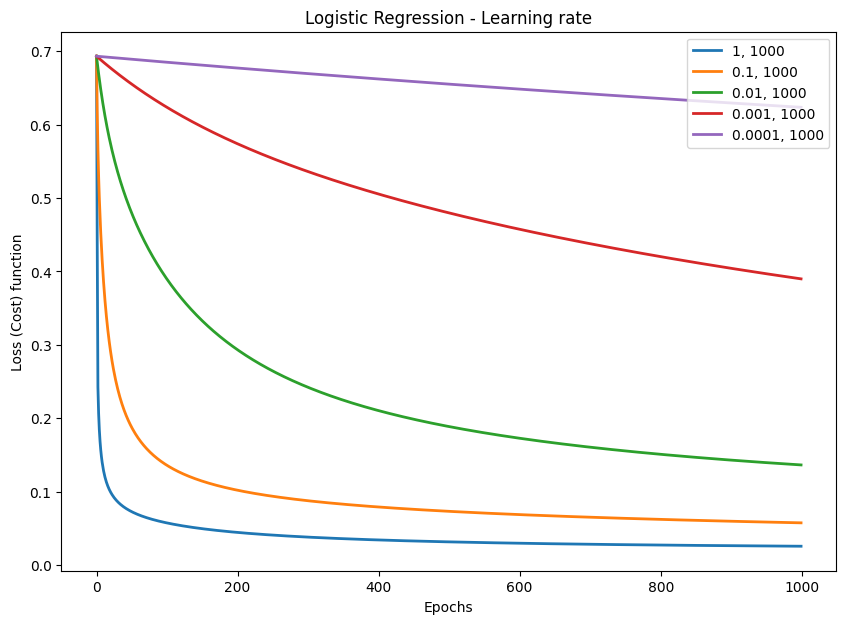

In [ ]:

plt.figure(figsize=(10, 7))

for i in range(0,len(eta_in)):
  exec(f'eta_t = lista{i}[0]')
  exec(f'n_epochs_t = lista{i}[1]')
  exec(f"""plt.plot(fcusto{i}, linewidth=2,label='{eta_t}, {n_epochs_t}')""")

  #plt.title('Logistic Regression - Learning rate: ' + str(eta))

plt.title('Logistic Regression - Learning rate')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss (Cost) function')
plt.show()

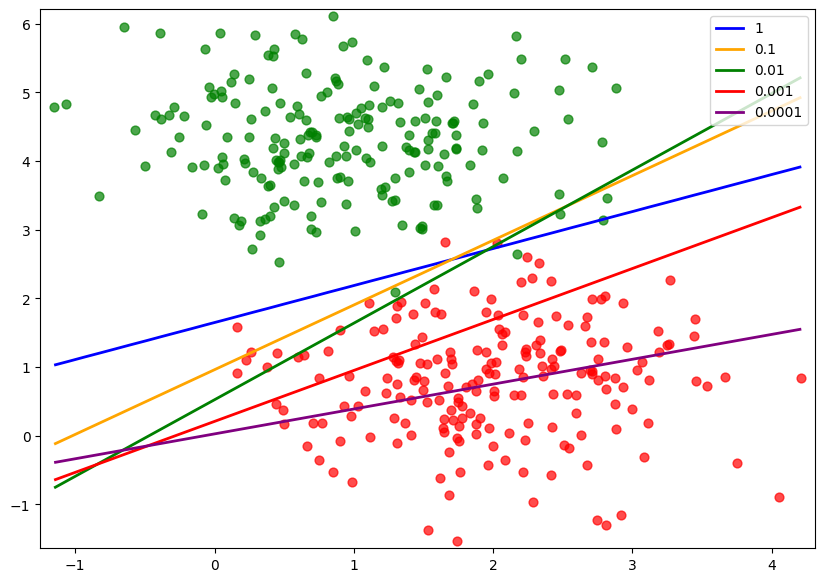

In [ ]:

plt.figure(figsize=(10, 7))
#plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='g', label='0', alpha=.7, s=40)
#plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1', alpha=.7, s=40)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='g', alpha=.7, s=40, label='Grupo 1')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', alpha=.7, s=40, label='Grupo 2')

x1_min, x1_max = X[:,0].min(), X[:,0].max()
x2_min, x2_max = X[:,1].min(), X[:,1].max()
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
# adiciona uma coluna de '1' correspondente ao weight(0)
grid_ones = addOnes_(grid)
# grid_ones = np.c_[np.ones(grid.shape[0]),grid]

for i in range(0,len(eta_in)):
  exec(f"""probs = predict_prob(grid_ones, w{i}).reshape(xx1.shape)""")
  #plt.contour(xx1, xx2, probs, [.5], linewidths=2, colors='#1820d0')
  plt.contour(xx1, xx2, probs, [.5], linewidths=2, colors=color[i])

legend_elements = [Line2D([0], [0], color=color[0], lw=2, label=lista0[0]),
                   Line2D([0], [0], color=color[1], lw=2, label=lista1[0]),
                   Line2D([0], [0], color=color[2], lw=2, label=lista2[0]),
                   Line2D([0], [0], color=color[3], lw=2, label=lista3[0]),
                   Line2D([0], [0], color=color[4], lw=2, label=lista4[0])]

plt.legend(handles=legend_elements)
plt.xlim(x1_min - .1, x1_max + .1)
plt.ylim(x2_min - .1, x2_max + .1)
plt.show()

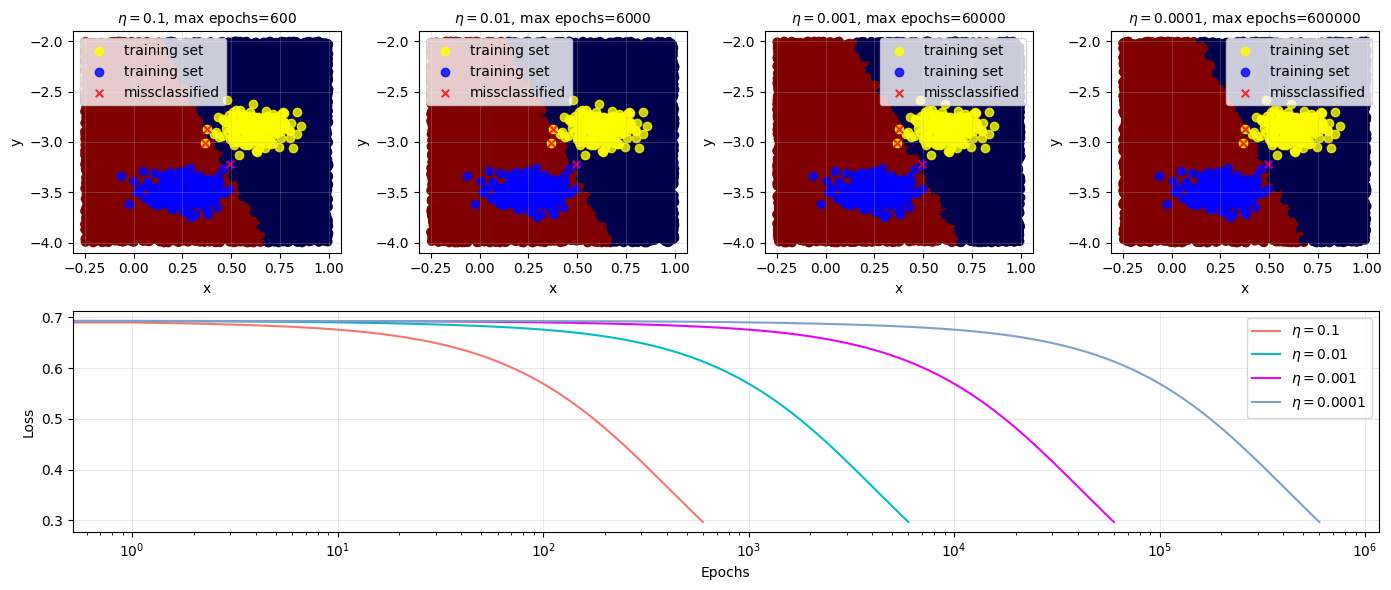

In [ ]:
from sklearn.datasets import make_blobs
import numpy as np
from matplotlib import pyplot as plt

def add_bias(X):
  return np.hstack((X, np.ones((X.shape[0], 1))))

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def loss(h, y):
  return -(y * np.log(h) + (1 - y) * np.log(1 - h)).mean()

def fit(X, y, max_iter=100, eta=1e-3, min_loss=1e-2):

    X = add_bias(X)
    weights = np.zeros(shape=(X.shape[1]))

    cost = []

    for i in range(max_iter):

        z = X.dot(weights)
        h = sigmoid(z)

        loss_ = loss(h, y)
        cost.append(loss_)

        grad = X.T.dot(h - y) / y.size
        weights -= eta * grad

        if loss_ < min_loss: break


    def prediction_f(x):
      return sigmoid(x.dot(weights[:-1]) + weights[-1]).round()

    return cost, weights, prediction_f

x, y = make_blobs(n_samples=400, n_features=2, centers=2, cluster_std=0.1, random_state=69420)

fig, ax = plt.subplot_mosaic([[0, 1, 2, 3],
                              ["cost", "cost", "cost", "cost"]], figsize=(14, 6), tight_layout=True)

cost_list = []
l_rates = [10**-i for i in range(1, 5)]
m_iters = (600, 6000, 60000, 600000)
for i, (lr, max_epochs) in enumerate(zip(l_rates, m_iters)):

    cost_, _, prediction = fit(x, y, max_iter=max_epochs, eta=lr, min_loss=-1)
    cost_list.append(cost_)

    y_pred = prediction(x)

    xx_plot = np.random.uniform(-0.25, 1, size=(10000, 1))
    xy_plot = np.random.uniform(-4, -2, size=(10000, 1))
    x_plot = np.hstack((xx_plot, xy_plot))

    y_plot = prediction(x_plot)

    ax[i].scatter(*x_plot.T, c=y_plot, cmap="seismic")

    ax[i].scatter(*x[y==0].T, color="yellow", alpha=0.8, label="training set")
    ax[i].scatter(*x[y==1].T, color="blue", alpha=0.8, label="training set")
    ax[i].scatter(*x[y!=y_pred].T, marker='x', color="red", s=30, alpha=0.8, label="missclassified")

    ax[i].set_xlabel('x')
    ax[i].set_ylabel('y')
    ax[i].set_title(f"$\eta={lr}$, max epochs={max_epochs}", fontsize=10)
    ax[i].grid(lw=0.4, alpha=0.5)
    ax[i].legend()

colors = ["#F8766D", "#00BFC4", "#E606F4", "#80A0CC", "#8B0000"]
for i, (cost, lr) in enumerate(zip(cost_list, l_rates)):
    ax["cost"].semilogx(cost, color=colors[i], label=f"$\eta={lr}$")
ax["cost"].set_xlabel("Epochs")
ax["cost"].set_ylabel("Loss")
ax["cost"].grid(lw=0.4, alpha=0.5)
ax["cost"].legend()

plt.show()

resolução

In [2]:
# -*- coding: utf-8 -*-
# Exercícios com DecisionTreeClassifier na base Iris

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Carrega o dataset Iris
X, y = load_iris(return_X_y=True)

# Divide em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print("=== Exercício 1: Critério de seleção dos ramos ===\n")
criterios = ["gini", "entropy", "log_loss"]

for criterio in criterios:
    arvore = DecisionTreeClassifier(criterion=criterio, random_state=42)
    arvore.fit(X_train, y_train)
    y_pred = arvore.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Critério: {criterio:8} → Acurácia: {acc:.4f}")

print("\n=== Exercício 2: Profundidade máxima da árvore ===\n")
profundidades = [1, 2, 3, 4, 5, None]

for profundidade in profundidades:
    arvore = DecisionTreeClassifier(max_depth=profundidade, random_state=42)
    arvore.fit(X_train, y_train)
    y_pred = arvore.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Max_Depth: {str(profundidade):>4} → Acurácia: {acc:.4f}")

print("\n=== Exercício 3 (bônus): combinação critério + profundidade ===\n")
print(f"{'Criterio':10} {'Profund.':>9} {'Acurácia':>10}")
for criterio in criterios:
    for profundidade in profundidades:
        arvore = DecisionTreeClassifier(criterion=criterio, max_depth=profundidade, random_state=42)
        arvore.fit(X_train, y_train)
        y_pred = arvore.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        print(f"{criterio:10} {str(profundidade):>9} {acc:10.4f}")


=== Exercício 1: Critério de seleção dos ramos ===

Critério: gini     → Acurácia: 1.0000
Critério: entropy  → Acurácia: 0.9778
Critério: log_loss → Acurácia: 0.9778

=== Exercício 2: Profundidade máxima da árvore ===

Max_Depth:    1 → Acurácia: 0.7111
Max_Depth:    2 → Acurácia: 0.9778
Max_Depth:    3 → Acurácia: 1.0000
Max_Depth:    4 → Acurácia: 1.0000
Max_Depth:    5 → Acurácia: 1.0000
Max_Depth: None → Acurácia: 1.0000

=== Exercício 3 (bônus): combinação critério + profundidade ===

Criterio    Profund.   Acurácia
gini               1     0.7111
gini               2     0.9778
gini               3     1.0000
gini               4     1.0000
gini               5     1.0000
gini            None     1.0000
entropy            1     0.7111
entropy            2     0.9778
entropy            3     0.9778
entropy            4     1.0000
entropy            5     0.9778
entropy         None     0.9778
log_loss           1     0.7111
log_loss           2     0.9778
log_loss           3     